In [1]:
%matplotlib widget

In [2]:
%cd ..

d:\Users\NitroPC\Documents\Python\ConcursoModelizacion2023


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from gradient_descent import Environment, Agent, ConstrainedLoss, CostLoss, DistanceLoss, optimize
from utils import plot_location

In [4]:
K=35
dt = 1.
g = 0.1
m = 10.
F_max = 11.
p_0 = np.array([50., 50., 100.])
v_0 = np.array([-10., 0., -10.])
alpha = 0.5
gamma = 1.

In [5]:
agent = Agent(K)
env = Environment(dt, gamma, g, m, p_0, v_0)

In [15]:
loss = ConstrainedLoss(dt, gamma, F_max, alpha)
optim = torch.optim.RMSprop(agent.parameters(), lr=1e-0)
scheduler = torch.optim.ExponentialLR(optim, gamma=0.99)

In [16]:
optimize(env, agent, loss, optim, scheduler, iters=1000)

694.40380859375
168.95187377929688
167.2705078125
213.18409729003906
181.1121063232422
166.9551544189453
173.8458709716797
165.6881561279297
214.14479064941406
170.55294799804688


In [17]:
f = agent()
p, v = env(f)

In [20]:
loss(f, p, v)

tensor(166.3481, grad_fn=<AddBackward0>)

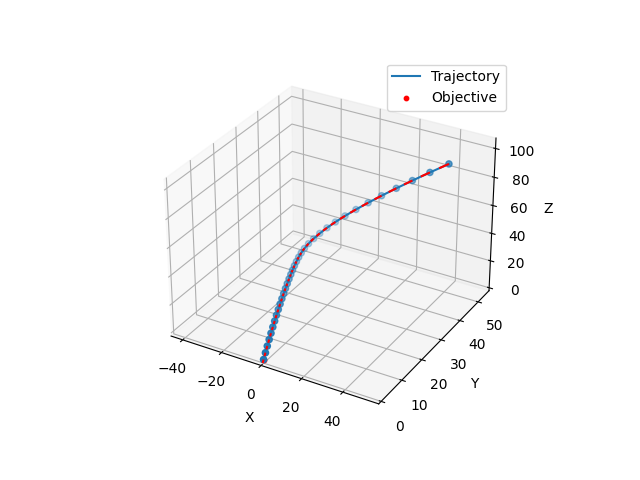

In [19]:
plot_location(p,v, lambd=0.5)